In [ ]:
# changing the 159* 159 to some even number as it is throwing some error
#performed my vae and freez on G (multi dimesnional matrix) as prposed
#cbm case western university dataset is prepared 
# and all features are given 1 seprate channel
# in multi_dimensional matrix H

# and features are forced to be in 1 channel only
# and are stored in multidimensional matrix G
# K FOLD VALIDATION HERE
import numpy as np
import pandas as pd
import random
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
%tensorflow_version 1.x

Using TensorFlow backend.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6],[7,8]])
c=np.concatenate((a, b), axis=1)

d=np.concatenate((a, b.T), axis=1)

e=np.concatenate((a, b), axis=None)
print(c,c.shape)

print(d,d.shape)
print(e,e.shape)

[[1 2 5 6]
 [3 4 7 8]] (2, 4)
[[1 2 5 7]
 [3 4 6 8]] (2, 4)
[1 2 3 4 5 6 7 8] (8,)


In [ ]:
a= np.zeros((1,1,3,3), dtype=np.float)
b= np.ones((1,1,3,3), dtype=np.float)
c=np.concatenate((a, b), axis=0)
print(c,c.shape)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]] (2, 1, 3, 3)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gh=9# img dimensio
ch=6
prod2=gh*ch
pc=100# per categry
tot=9 #total_num_of_category
sam=pc*4*tot
pc_test=15
sam_test=pc_test*4*tot

In [ ]:
#H=np.zeros((2520,3,160,160), dtype=np.float)#features into different channel
#H_test=np.zeros((360,3,160,160), dtype=np.float)
G=np.zeros((sam,1,ch*3,gh), dtype=np.float)#features in 1 channel

G_test=np.zeros((sam_test,1,ch*3,gh), dtype=np.float)
#there are 36 categories and each have 10  so 360
d=G[0,0,:,:]
print(d.shape)

(18, 9)


In [ ]:
random.seed(42)
print(random.randint(0,45))
print(random.randint(0,45))
print(random.randint(0,45))

40
7
1


BOO7_1= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR007_0.csv",header=None) 
BOO7_1=BOO7_1.values

In [ ]:
B007_0= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/B007_0.csv",header=None) 
B007_0=B007_0.values #legth=122571


for i in range(0,pc,1):
 
  len2=B007_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B007_0[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B007_0[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B007_0[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
#############################

for i in range(0,pc_test,1):
  

  len2=B007_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B007_0[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B007_0[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B007_0[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
B007_1= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/B007_1.csv",header=None) ## yha he change ho rha hai
B007_1=B007_1.values #legth=122571


for i in range(pc,2*pc,1):
  

  len2=B007_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B007_1[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B007_1[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B007_1[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
#############

for i in range(pc_test,2*pc_test,1):

  len2=B007_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B007_1[end2:end2+prod2,0]
  G_test[i,0, 0:ch,:]=d.reshape(ch,gh)

  e=B007_1[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B007_1[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
B007_2= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/B007_2.csv",header=None) 
B007_2=B007_2.values #legth=122571


for i in range(pc*2,pc*3,1):
  
  

  len2=B007_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B007_2[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B007_2[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B007_2[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
#############


for i in range(2*pc_test,3*pc_test,1):

  len2=B007_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B007_2[end2:end2+prod2,0]
  G_test[i,0, 0:ch,:]=d.reshape(ch,gh)

  e=B007_2[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B007_2[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)


B007_3= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/B007_3.csv",header=None) 
B007_3=B007_3.values #legth=122571


for i in range(3*pc,4*pc,1):
  

  len2=B007_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B007_3[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B007_3[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B007_3[end2:end2+prod2,2]
  G[i,0, ch*2:ch*3,:]=f.reshape(ch,gh)


####
for i in range( 3*pc_test,4*pc_test,1):
  
  

  len2=B007_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B007_3[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B007_3[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B007_3[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

IR007_0= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR007_0.csv",header=None) 
IR007_0=IR007_0.values #legth=122571


for i in range(4*pc,5*pc,1):
  
  

  len2=IR007_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR007_0[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR007_0[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR007_0[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

#########
for i in range(4*pc_test,5*pc_test,1):
  
  

  len2=IR007_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR007_0[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR007_0[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR007_0[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)


IR007_1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR007_1.csv",header=None) ## yha he change ho rha hai
IR007_1=IR007_1.values #legth=122571


for i in range(5*pc,6*pc,1):
  

  len2=IR007_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR007_1[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR007_1[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR007_1[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
###################
for i in range(5*pc_test,6*pc_test,1):
  
  len2=IR007_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR007_1[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR007_1[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR007_1[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

IR007_2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR007_2.csv",header=None) ## yha he change ho rha hai
IR007_2=IR007_2.values #legth=122571


for i in range(6*pc,7*pc,1):
  

  len2=IR007_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR007_2[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR007_2[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR007_2[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

#####
for i in range(6*pc_test,7*pc_test,1):
  
  

  len2=IR007_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR007_2[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR007_2[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR007_2[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)


IR007_3= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR007_3.csv",header=None) ## yha he change ho rha hai
IR007_3=IR007_3.values #legth=122571


for i in range(7*pc,8*pc,1):
 
  

  len2=IR007_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR007_3[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape( ch,gh)

  e=IR007_3[end2:end2+prod2,1]
  G[i,0, ch:ch*2,:]=e.reshape( ch,gh)

  f=IR007_3[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape( ch,gh)


#########
for i in range(7*pc_test,8*pc_test,1):
  
  

  len2=IR007_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR007_3[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape( ch,gh)

  e=IR007_3[end2:end2+prod2,1]
  G_test[i,0, ch:ch*2,:]=e.reshape( ch,gh)

  f=IR007_3[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape( ch,gh) 

OR007_0= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/OR007_0.csv",header=None) ## yha he change ho rha hai
OR007_0=OR007_0.values #legth=122571


for i in range(8*pc,9*pc,1):
  
  len2=OR007_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR007_0[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR007_0[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR007_0[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

##########
for i in range(8*pc_test,9*pc_test,1):
  
  

  len2=OR007_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR007_0[end2:end2+prod2,0]
  G_test[i,0, 0:ch,:]=d.reshape(ch,gh)

  e=OR007_0[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR007_0[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)


OR007_1= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/OR007_1.csv",header=None) ## yha he change ho rha hai
OR007_1=OR007_1.values #legth=122571


for i in range(9*pc,10*pc,1):
  

  len2=OR007_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR007_1[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR007_1[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR007_1[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

####
for i in range(9*pc_test,10*pc_test,1):

  len2=OR007_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR007_1[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh) 

  e=OR007_1[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR007_1[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)


OR007_2= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/OR007_2.csv",header=None) ## yha he change ho rha hai
OR007_2=OR007_2.values #legth=122571


for i in range(10*pc,11*pc,1):
  

  len2=OR007_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR007_2[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR007_2[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR007_2[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

####
for i in range(10*pc_test,11*pc_test,1):
  

  len2=OR007_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR007_2[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR007_2[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR007_2[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

OR007_3= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/OR007_3.csv",header=None) ## yha he change ho rha hai
OR007_3=OR007_3.values #legth=122571


for i in range(11*pc,12*pc,1):
 
  len2=OR007_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR007_3[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR007_3[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR007_3[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

###
for i in range(11*pc_test,12*pc_test,1):

  len2=OR007_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR007_3[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR007_3[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR007_3[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh) 


B014_0= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/B014_0.csv",header=None) ## yha he change ho rha hai
B014_0=B014_0.values #legth=122571


for i in range(12*pc,13*pc,1):

  len2=B014_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B014_0[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B014_0[end2:end2+prod2,1]
  G[i,0,ch:2*ch,:]=e.reshape(ch,gh)

  f=B014_0[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)


####
for i in range(12*pc_test,13*pc_test,1):
  
  len2=B014_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B014_0[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B014_0[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)            

  f=B014_0[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

B014_1= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/B014_1.csv",header=None) ## yha he change ho rha hai
B014_1=B014_1.values #legth=122571


for i in range(13*pc,14*pc,1):
  

  len2=B014_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B014_1[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B014_1[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B014_1[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)


########
for i in range(13*pc_test,14*pc_test,1):

  len2=B014_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B014_1[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B014_1[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B014_1[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)


B014_2= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/B014_2.csv",header=None) ## yha he change ho rha hai
B014_2=B014_2.values #legth=122571

for i in range(14*pc,15*pc,1):

  len2=B014_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B014_2[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B014_2[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B014_2[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
######  

for i in range(14*pc_test,15*pc_test,1):

  len2=B014_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B014_2[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B014_2[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B014_2[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)


B014_3= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/B014_3.csv",header=None) ## yha he change ho rha hai
B014_3=B014_3.values #legth=122571


for i in range(15*pc,16*pc,1):
  
  

  len2=B014_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B014_3[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B014_3[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B014_3[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

#####  
for i in range(15*pc_test,16*pc_test,1):
  
  

  len2=B014_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B014_3[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B014_3[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B014_3[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)


IR014_0= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR014_0.csv",header=None) ## yha he change ho rha hai
IR014_0=IR014_0.values #legth=122571


for i in range(16*pc,17*pc,1):
  
  

  len2=IR014_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR014_0[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR014_0[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR014_0[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

##########
for i in range(16*pc_test,17*pc_test,1):

  len2=IR014_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR014_0[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR014_0[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR014_0[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh) 

IR014_1= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR014_1.csv",header=None) ## yha he change ho rha hai
IR014_1=IR014_1.values #legth=122571


for i in range(17*pc,18*pc,1):

  len2=IR014_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR014_1[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR014_1[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR014_1[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
###########
for i in range(17*pc_test,18*pc_test,1):

  len2=IR014_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR014_1[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR014_1[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR014_1[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh) 

IR014_2= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR014_2.csv",header=None) ## yha he change ho rha hai
IR014_2=IR014_2.values #legth=122571


for i in range(18*pc,19*pc,1):
 
  len2=IR014_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR014_2[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR014_2[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR014_2[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
##########
for i in range(18*pc_test,19*pc_test,1):
  

  len2=IR014_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR014_2[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR014_2[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR014_2[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)   

IR014_3= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR014_3.csv",header=None) ## yha he change ho rha hai
IR014_3=IR014_3.values #legth=122571


for i in range(19*pc,20*pc,1):
  
  

  len2=IR014_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR014_3[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR014_3[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR014_3[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
########
for i in range(19*pc_test,20*pc_test,1):

  len2=IR014_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR014_3[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR014_3[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR014_3[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

OR014_0= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/OR014_0.csv",header=None) ## yha he change ho rha hai
OR014_0=OR014_0.values #legth=122571


for i in range(20*pc,21*pc,1):

  len2=OR014_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR014_0[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR014_0[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR014_0[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
###########
for i in range(20*pc_test,21*pc_test,1):

  len2=OR014_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR014_0[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR014_0[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR014_0[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh) 

OR014_1= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/OR014_1.csv",header=None) ## yha he change ho rha hai
OR014_1=OR014_1.values #legth=122571


for i in range(21*pc,22*pc,1):
  

  len2=OR014_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR014_1[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR014_1[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR014_1[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
####
for i in range(21*pc_test,22*pc_test,1):
  

  len2=OR014_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR014_1[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR014_1[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR014_1[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh) 

OR014_2= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/OR014_2.csv",header=None) ## yha he change ho rha hai
OR014_2=OR014_2.values #legth=122571


for i in range(22*pc,23*pc,1):

  len2=OR014_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR014_2[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR014_2[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR014_2[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
#######
for i in range(22*pc_test,23*pc_test,1):

  len2=OR014_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR014_2[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR014_2[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR014_2[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh) 

OR014_3= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/OR014_3.csv",header=None) ## yha he change ho rha hai
OR014_3=OR014_3.values #legth=122571

for i in range(23*pc,24*pc,1):

  len2=OR014_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR014_3[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR014_3[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR014_3[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
#######
for i in range(23*pc_test,24*pc_test,1):

  len2=OR014_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR014_3[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR014_3[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR014_3[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)       


B021_0= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/B021_0.csv",header=None) ## yha he change ho rha hai
B021_0=B021_0.values #legth=122571


for i in range(24*pc,25*pc,1):

  len2=B021_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B021_0[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B021_0[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B021_0[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
###########
for i in range(24*pc_test,25*pc_test,1):

  len2=B021_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B021_0[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B021_0[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B021_0[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

B021_1= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/B021_1.csv",header=None) ## yha he change ho rha hai
B021_1=B021_1.values #legth=122571

for i in range(25*pc,26*pc,1):

  len2=B021_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B021_1[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B021_1[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B021_1[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
#########
for i in range(25*pc_test,26*pc_test,1):

  len2=B021_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B021_1[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B021_1[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B021_1[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)


B021_2= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/B021_2.csv",header=None) ## yha he change ho rha hai
B021_2=B021_2.values #legth=122571

for i in range(26*pc,27*pc,1):

  len2=B021_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B021_2[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B021_2[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B021_2[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
###########
for i in range(26*pc_test,27*pc_test,1):

  len2=B021_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B021_2[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B021_2[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B021_2[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)


B021_3= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/B021_3.csv",header=None) ## yha he change ho rha hai
B021_3=B021_3.values #legth=122571


for i in range(27*pc,28*pc,1):

  len2=B021_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B021_3[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B021_3[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B021_3[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
#######
for i in range(27*pc_test,28*pc_test,1):

  len2=B021_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=B021_3[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=B021_3[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=B021_3[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh) 

IR021_0= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR021_0.csv",header=None) ## yha he change ho rha hai
IR021_0=IR021_0.values #legth=122571


for i in range(28*pc,29*pc,1):

  len2=IR021_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR021_0[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR021_0[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR021_0[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
##########
for i in range(28*pc_test,29*pc_test,1):

  len2=IR021_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR021_0[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR021_0[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR021_0[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh) 


IR021_1= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR021_1.csv",header=None) ## yha he change ho rha hai
IR021_1=IR021_1.values #legth=122571


for i in range(29*pc,30*pc,1):

  len2=IR021_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR021_1[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR021_1[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR021_1[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
###########
for i in range(29*pc_test,30*pc_test,1):
  

  len2=IR021_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR021_1[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR021_1[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR021_1[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh) 
  
IR021_2= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR021_2.csv",header=None) ## yha he change ho rha hai
IR021_2=IR021_2.values #legth=122571


for i in range(30*pc,31*pc,1):

  len2=IR021_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR021_2[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR021_2[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR021_2[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
#########
for i in range(30*pc_test,31*pc_test,1):
  

  len2=IR021_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR021_2[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR021_2[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR021_2[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)

IR021_3= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/IR021_3.csv",header=None) ## yha he change ho rha hai
IR021_3=IR021_3.values #legth=122571


for i in range(31*pc,32*pc,1):

  len2=IR021_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR021_3[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR021_3[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR021_3[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
#######
for i in range(31*pc_test,32*pc_test,1):

  len2=IR021_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=IR021_3[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=IR021_3[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=IR021_3[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
OR021_0= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/OR021_0.csv",header=None) ## yha he change ho rha hai
OR021_0=OR021_0.values #legth=122571


for i in range(32*pc,33*pc,1):

  len2=OR021_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR021_0[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR021_0[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR021_0[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
#######
for i in range(32*pc_test,33*pc_test,1):

  len2=OR021_0.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR021_0[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR021_0[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR021_0[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
OR021_1= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/OR021_1.csv",header=None) ## yha he change ho rha hai
OR021_1=OR021_1.values #legth=122571


for i in range(33*pc,34*pc,1):

  len2=OR021_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR021_1[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR021_1[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR021_1[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
###########
for i in range(33*pc_test,34*pc_test,1):

  len2=OR021_1.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR021_1[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR021_1[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR021_1[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh) 

OR021_2= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/OR021_2.csv",header=None) ## yha he change ho rha hai
OR021_2=OR021_2.values #legth=122571


for i in range(34*pc,35*pc,1):

  len2=OR021_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR021_2[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR021_2[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR021_2[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
############
for i in range(34*pc_test,35*pc_test,1):
  

  len2=OR021_2.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR021_2[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR021_2[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR021_2[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh) 

OR021_3= pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_csv/OR021_3.csv",header=None) ## yha he change ho rha hai
OR021_3=OR021_3.values #legth=122571


for i in range(35*pc,36*pc,1):

  len2=OR021_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR021_3[end2:end2+prod2,0]
  G[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR021_3[end2:end2+prod2,1]
  G[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR021_3[end2:end2+prod2,2]
  G[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)
######
for i in range(35*pc_test,36*pc_test,1):
  
  len2=OR021_3.shape[0]-prod2
  end2=random.randint(0,len2)
  d=OR021_3[end2:end2+prod2,0]
  G_test[i,0,0:ch,:]=d.reshape(ch,gh)

  e=OR021_3[end2:end2+prod2,1]
  G_test[i,0,ch:ch*2,:]=e.reshape(ch,gh)

  f=OR021_3[end2:end2+prod2,2]
  G_test[i,0,ch*2:ch*3,:]=f.reshape(ch,gh)            

In [ ]:
pip install pyts

In [ ]:
import matplotlib.pyplot as plt
from pyts.multivariate.image import JointRecurrencePlot
import numpy as np

In [ ]:
#creating dataset for recurrence plot
Grp=np.zeros((sam,3,ch*gh), dtype=np.float)

Grp_train=np.zeros((sam_test,3,ch*gh), dtype=np.float)

print(Grp[i,:,:].shape)
for i in range(0,sam,1):
   Grp[i,0,:]=G[i,0,0:ch,:].reshape(1,ch*gh)
   Grp[i,1,:]=G[i,0,ch:2*ch,:].reshape(1,ch*gh)
   Grp[i,2,:]=G[i,0,2*ch:3*ch,:].reshape(1,ch*gh)
jrp1=JointRecurrencePlot(threshold='point', percentage=50)
g_x= jrp1.fit_transform(Grp)



  

(3, 54)


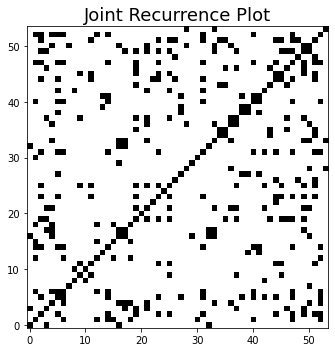

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(g_x[2], cmap='binary', origin='lower')
plt.title('Joint Recurrence Plot', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:


for i in range(0,sam_test,1):
   Grp_train[i,0,:]=G_test[i,0,0:ch,:].reshape(1,ch*gh)
   Grp_train[i,1,:]=G_test[i,0,ch:2*ch,:].reshape(1,ch*gh)
   Grp_train[i,2,:]=G_test[i,0,2*ch:3*ch,:].reshape(1,ch*gh)
jrp2=JointRecurrencePlot(threshold='point', percentage=50)
g_x_test= jrp2.fit_transform(Grp_train)



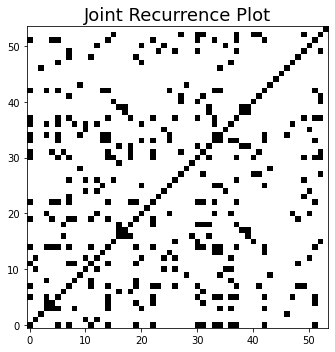

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(g_x_test[2], cmap='binary', origin='lower')
plt.title('Joint Recurrence Plot', fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
#G = np.moveaxis(G, 1, 3) ## channel last format
#G_test=np.moveaxis(G_test,1,3)
#H=np.moveaxis(H, 1, 3)
#H_test=np.moveaxis(H_test, 1, 3)
print(g_x.shape)
g_x=g_x.reshape(sam,54,54,1)
g_x_test=g_x_test.reshape(sam_test,54,54,1)
from keras import layers
from keras import layers
from keras.models import Model
from keras import metrics
from keras import backend as K

(3600, 54, 54)


In [ ]:
img_shape = (54, 54, 1)    # for MNIST
batch_size = 11
latent_dim =4  # Number of latent dimension parameters

# Encoder architecture: Input -> Conv2D*4 -> Flatten -> Dense
input_img = keras.Input(shape=img_shape)#(None, 28, 28, 1)

x = layers.Conv2D(32, 3,
                  padding='same', 
                  activation='relu')(input_img) #(None, 28, 28, 32)

x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu',
                  strides=(2, 2))(x)#(None, 14, 14, 64)

x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu')(x)#(None, 14, 14, 64)

x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu')(x) #(None, 14, 14, 64)

# need to know the shape of the network here for the decoder
shape_before_flattening = K.int_shape(x)#shape_before_flattening (None, 14, 14, 64)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x) #(None, 32)


# Two outputs, latent mean and (log)variance
z_mu = layers.Dense(latent_dim)(x)#Tensor("dense_5/BiasAdd:0", shape=(None, 2), dtype=float32)
z_log_sigma = layers.Dense(latent_dim)(x)#Tensor("dense_5/BiasAdd:0", shape=(None, 2), dtype=float32)

# sampling function
def sampling(args):
    z_mu, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mu)[0], latent_dim),
                              mean=0., stddev=1)
    return z_mu + K.exp(z_log_sigma) * epsilon

# sample vector from the latent distribution
z = layers.Lambda(sampling,output_shape=(latent_dim,) )([z_mu, z_log_sigma]) #(None, 2)

# decoder takes the latent distribution sample as input
decoder_input = layers.Input(K.int_shape(z)[1:]) #K.int_shape(z)[1:]=(2,)  #K.int_shape(z)[0:]=(None, 2)
#decoder _input shape=(None, 2)
# Expand to 784 total pixels
#print(shape_before_flattening[1:]) =(14, 14, 64)
x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input) #(None, 12544)


# reshape
x = layers.Reshape(shape_before_flattening[1:])(x) #(None, 14, 14, 64)

# use Conv2DTranspose to reverse the conv layers from the encoder
x = layers.Conv2DTranspose(32, 3,
                           padding='same', 
                           activation='relu',
                           strides=(2, 2))(x) # (None, 14, 14, 64)

x = layers.Conv2D(1, 3,
                  padding='same', 
                  activation='sigmoid')(x) #(None, 28, 28, 1)  



# decoder model statement
decoder = Model(decoder_input, x)


# apply the decoder to the sample from the latent distribution
print(z.shape)

z_decoded = decoder(z)#(None, 28, 28, 1)
print(z_decoded)

RuntimeError: ignored

In [ ]:
# construct a custom layer to calculate the loss
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        # Reconstruction loss
        
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        # KL divergence
        print(z_log_sigma.shape)
        kl_loss = -0.5* K.sum(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1)
        return K.mean(xent_loss + kl_loss)

    # adds the custom loss to the class
    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x

# apply the custom loss to the input images and the decoded latent distribution sample
y = CustomVariationalLayer()([input_img, z_decoded])
print(y.shape)

In [ ]:
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)


In [ ]:
vae.fit(x=g_x, y=None,
        shuffle=True,
        epochs=50,
        batch_size=1,
        validation_data=(g_x_test, None))

In [ ]:
layer_name = 'my_layer'
intermediate_layer_model = Model(inputs=vae.input,outputs=vae.get_layer(x).output)
intermediate_output = intermediate_layer_model.predict(g_x)

In [ ]:
for layer in vae.layers[:]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vae.layers:
    print(layer, layer.trainable)


In [ ]:
lay1_1= layers.Dense(128, activation='relu')(z)


lay61   =layers.Dense(128, activation='relu')(lay1_1)
lay71=layers.Dense(9,activation='softmax')(lay61)

vae_f1=Model(input_img,lay71) 
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
vae_f1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
vae_f1.summary()

In [ ]:
for layer in vae_f1.layers:
    print(layer, layer.trainable)

In [ ]:
y_train=np.zeros((sam,1), dtype=np.float)
y_train[0:4*pc,0]=  0         #1
y_train[4*pc:8*pc,0] =1       
y_train[8*pc:12*pc,0]=2
y_train[12*pc:16*pc,0]=3
y_train[16*pc:20*pc,0]=4
y_train[20*pc:24*pc,0]=5
y_train[24*pc:28*pc,0]=6
y_train[28*pc:32*pc,0]=7
y_train[32*pc:36*pc,0]=8
y_train = keras.utils.to_categorical(y_train, 9)

y_test=np.zeros((sam_test,1), dtype=np.float)
y_test[0:4*pc,0]=  0      
y_test[4*pc:8*pc,0] =1       
y_test[8*pc:12*pc,0]=2
y_test[12*pc:16*pc,0]=3
y_test[16*pc:20*pc,0]=4
y_test[20*pc:24*pc,0]=5
y_test[24*pc:28*pc,0]=6
y_test[28*pc:32*pc,0]=7
y_test[32*pc:36*pc,0]=8
y_test = keras.utils.to_categorical(y_test, 9)

In [ ]:
vae_f1.fit(x=g_x, y=y_train,
        shuffle=True,
        epochs=50,
        batch_size=1,
        validation_data=(g_x_test,y_test))  

In [ ]:
'''import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(G_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,11,1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(G_test[i].reshape(60, 60))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(60, 60))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
'''

In [ ]:
# hot encoding for training
# target variables for training
#
y_train=np.zeros((sam,1), dtype=np.float)
y_train[0:4*pc,0]=  0         #1
y_train[4*pc:8*pc,0] =1       
y_train[8*pc:12*pc,0]=2
y_train[12*pc:16*pc,0]=3
y_train[16*pc:20*pc,0]=4
y_train[20*pc:24*pc,0]=5
y_train[24*pc:28*pc,0]=6
y_train[28*pc:32*pc,0]=7
y_train[32*pc:36*pc,0]=8
y_train = keras.utils.to_categorical(y_train, 9)


In [ ]:
#target variables for testing

y_test=np.zeros((sam_test,1), dtype=np.float)
y_test[0:4*pc,0]=  0      
y_test[4*pc:8*pc,0] =1       
y_test[8*pc:12*pc,0]=2
y_test[12*pc:16*pc,0]=3
y_test[16*pc:20*pc,0]=4
y_test[20*pc:24*pc,0]=5
y_test[24*pc:28*pc,0]=6
y_test[28*pc:32*pc,0]=7
y_test[32*pc:36*pc,0]=8
y_test = keras.utils.to_categorical(y_test, 9)

In [ ]:
plt.figure(1)
plt.subplot(221)
plt.imshow(G[0][:,:,0])

plt.subplot(222)
plt.imshow(G[150][:,:,0])

plt.subplot(223)
plt.imshow(G[250][:,:,0])

plt.subplot(224)
plt.imshow(G[350][:,:,0])
plt.show()

In [ ]:
#print(H.shape)
print(G.shape)
'''
H=H[:,:,:,0]
H=H.reshape(, 160, 160,1)
H_test=H[:,:,:,0]
H_test=H.reshape(2520, 160, 160,1)
print(H.shape)
'''
from keras import layers

In [ ]:
from keras.losses import mse

In [ ]:
# sampling function
def sampling(args):
    z_mu1, z_log_sigma1 = args
    epsilon1 = K.random_normal(shape=(K.shape(z_mu1)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mu1 + K.exp(z_log_sigma1) * epsilon1

# sample vector from the latent distribution
z1 = layers.Lambda(sampling,output_shape=(latent_dim,) )([z_mu1, z_log_sigma1]) #(None, 2)


In [ ]:
from keras.models import Model

In [ ]:
# decoder takes the latent distribution sample as input
decoder_input1 = layers.Input(K.int_shape(z1)[1:]) #K.int_shape(z)[1:]=(2,)  #K.int_shape(z)[0:]=(None, 2)
#decoder _input shape=(None, 2)
# Expand to 784 total pixels
#print(shape_before_flattening[1:]) =(14, 14, 64)

x1 = layers.Dense(np.prod(shape_before_flattening1[1:]),
                 activation='relu')(decoder_input1) #(None, 12544)


# reshape
x1 = layers.Reshape(shape_before_flattening1[1:])(x1) #(None, 14, 14, 64)

# use Conv2DTranspose to reverse the conv layers from the encoder
 # (None, 14, 14, 64)

x1 = layers.Conv2DTranspose(32, 3,
                           padding='same', 
                           activation='relu',
                           strides=(2, 2))(x1) # (None, 14, 14, 64)

x1 = layers.Conv2D(1, 3,
                  padding='same', 
                  activation='sigmoid')(x1) #(None, 28, 28, 1)  



# decoder model statement
decoder1 = Model(decoder_input1, x1)
decoder1.summary()

# apply the decoder to the sample from the latent distribution
print(z1.shape)

z_decoded1 = decoder1(z1)#(None, 28, 28, 1)
print(z_decoded1)

In [ ]:
# construct a custom layer to calculate the loss
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x1, z_decoded1):
        x1 = K.flatten(x1)
        z_decoded1 = K.flatten(z_decoded1)
        # Reconstruction loss
        
        xent_loss1 = 54*54*mse(x1, z_decoded1)
        
        # KL divergence
        print(z_log_sigma1.shape)
        kl_loss1 = -0.5 * K.mean(1 + z_log_sigma1 - K.square(z_mu1) - K.exp(z_log_sigma1), axis=-1)
    
        return K.mean( kl_loss1)

    # adds the custom loss to the class
    def call(self, inputs):
        x1 = inputs[0]
        z_decoded1 = inputs[1]
        loss = self.vae_loss(x1, z_decoded1)
        self.add_loss(loss, inputs=inputs)
        return x1

# apply the custom loss to the input images and the decoded latent distribution sample
y1 = CustomVariationalLayer()([input_img, z_decoded1])
print(y1.shape)

In [ ]:
# VAE model statement
vae1 = Model(input_img, y1)
vae1.compile(optimizer='rmsprop', loss=None)
vae1.summary()



In [ ]:
print(G_test.shape)

In [ ]:
vae1.fit(x=G, y=None,
        shuffle=True,
        epochs=50,
        batch_size=1,
        validation_data=(G_test, None))                             

In [ ]:
for layer in vae1.layers[:]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vae1.layers:
    print(layer, layer.trainable)

In [ ]:
lay1_1= layers.Dense(128, activation='relu')(z1)


lay61   =layers.Dense(32, activation='relu')(lay1_1)
lay71=layers.Dense(9,activation='softmax')(lay61)

vae_f1=Model(input_img,lay71) 
opt = keras.optimizers.RMSprop( lr=0.001,decay=1e-6)
vae_f1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
vae_f1.summary()

In [ ]:
for layer in vae_f1.layers:
    print(layer, layer.trainable)

In [ ]:
vae_f1.fit(x=G, y=y_train,
        shuffle=True,
        epochs=50,
        batch_size=1,
        validation_data=(G_test,y_test))  

In [ ]:
from sklearn.model_selection import KFold
def define_model():
  input_shape= (1,159,159)
  epochs=10
  model = Sequential()
  model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',data_format='channels_first',
                 input_shape=input_shape))

  model.add(Conv2D(8,kernel_size= (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(9, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
  return model
def evaluate_model(dataX, dataY, n_folds=3):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=1, validation_data=(testX, testY), verbose=1)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories  
scores , histories = evaluate_model(G, y_train, n_folds=15)  
 
'''
  model.fit(G, y_train,
          batch_size=1,
          epochs=epochs,
          verbose=1,shuffle =True, validation_data=(G_test, y_test)
          )
'''
#score = model.evaluate(G_test, y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

In [ ]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [ ]:
summarize_diagnostics(histories)

In [ ]:

'''
# run the epochs wait till error becomes at least less than 0.01 and less
# use diffeernt learning rates 
do a k fold validation first of all
and check acurracy in new generated images 
# does it overfit
# plot each fault category as image and each faeture as image 
# applying HOG/sift/

'''

In [ ]:
df= np.array([[1,2,3,4],
              [5,6,7,8],
              [9,10,255,12],
              [13,14,15,16],
              [88,99,100,190]])

from pylab import *

figure(1)
imshow(G[1,0,:,:], interpolation='nearest')



In [ ]:


f, axarr = plt.subplots(1,2)
plt.figure(figsize = (7,7))
axarr[0,0].imshow(G[1,0,:,:], interpolation='nearest',aspect='auto')
plt.figure(figsize = (7,7))
axarr[0,1].imshow(G[350,0,:,:], interpolation='nearest',aspect='auto')

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize = (7,7))
plt.imshow(G[1,0,:,:], interpolation='nearest',aspect='auto')


plt.figure(figsize = (7,7))
plt.imshow(G[350,0,:,:], interpolation='nearest',aspect='auto')


In [ ]:
random.seed(42)
from tempfile import TemporaryFile
outfile = TemporaryFile()
x = np.random_3d_matrix_array = np.random.rand(3, 4, 2)
np.save(outfile, x)


